In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import string
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model, save_model

In [ ]:
IMAGE_FOLDER_PATH = '/content/drive/MyDrive/lewis_letters/'

In [ ]:
letters = string.ascii_uppercase
letters = [letter for letter in letters if letter not in ['Z','J']]
letters

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [ ]:
files = glob.glob(IMAGE_FOLDER_PATH+str(letters[0])+'/*.bmp')
print(len(files))

1021

In [ ]:
print(files[0])

/content/drive/MyDrive/lewis_letters/A/A5431099e-c54e-47ca-921c-2ca41c6846ba.bmp


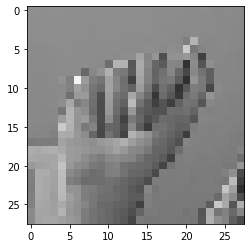

In [ ]:
img = cv2.imread(files[1000])
plt.imshow(img)

In [ ]:
img.shape

(28, 28, 3)

In [ ]:
a,b,c,d,e,f,g,h,i,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
letter_lists = [a,b,c,d,e,f,g,h,i,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y]

for i in range(0,len(letters)):
    imgs = []
    files = glob.glob(IMAGE_FOLDER_PATH+str(letters[i])+'/*.bmp')
    print(len(files))

    for file in files:
        img = cv2.imread(file)
        imgs.append(img)
    
    letter_lists[i] = imgs
    print(np.asarray(letter_lists[i]).shape)



1021
(1021, 28, 28, 3)
1206
(1206, 28, 28, 3)
1303
(1303, 28, 28, 3)
1117
(1117, 28, 28, 3)
1086
(1086, 28, 28, 3)
1074
(1074, 28, 28, 3)
1100
(1100, 28, 28, 3)
1001
(1001, 28, 28, 3)
1053
(1053, 28, 28, 3)
1093
(1093, 28, 28, 3)
1161
(1161, 28, 28, 3)
1171
(1171, 28, 28, 3)
1154
(1154, 28, 28, 3)
1022
(1022, 28, 28, 3)
1158
(1158, 28, 28, 3)
1016
(1016, 28, 28, 3)
1334
(1334, 28, 28, 3)
1049
(1049, 28, 28, 3)
1134
(1134, 28, 28, 3)
1080
(1080, 28, 28, 3)
1342
(1342, 28, 28, 3)
1408
(1408, 28, 28, 3)
1082
(1082, 28, 28, 3)
1061
(1061, 28, 28, 3)


In [ ]:
len(letter_lists[23])

1061

In [ ]:
for i in range(0,len(letter_lists)):
    filename = '/content/drive/MyDrive/lewis_img_arrays/img{}.npy'.format(i)
    np.save(filename,np.asarray(letter_lists[i]))

In [ ]:
np.asarray(letter_lists[0]).reshape(len(letter_lists[0]),2352).shape

(1021, 2352)

In [ ]:
df_a = pd.DataFrame(data=np.asarray(letter_lists[0]).reshape(len(letter_lists[0]),(28*28*3)))
df_b = pd.DataFrame(data=np.asarray(letter_lists[1]).reshape(len(letter_lists[1]),(28*28*3)))
df_c = pd.DataFrame(data=np.asarray(letter_lists[2]).reshape(len(letter_lists[2]),(28*28*3)))
df_d = pd.DataFrame(data=np.asarray(letter_lists[3]).reshape(len(letter_lists[3]),(28*28*3)))
df_e = pd.DataFrame(data=np.asarray(letter_lists[4]).reshape(len(letter_lists[4]),(28*28*3)))
df_f = pd.DataFrame(data=np.asarray(letter_lists[5]).reshape(len(letter_lists[5]),(28*28*3)))
df_g = pd.DataFrame(data=np.asarray(letter_lists[6]).reshape(len(letter_lists[6]),(28*28*3)))
df_h = pd.DataFrame(data=np.asarray(letter_lists[7]).reshape(len(letter_lists[7]),(28*28*3)))
df_i = pd.DataFrame(data=np.asarray(letter_lists[8]).reshape(len(letter_lists[8]),(28*28*3)))
df_k = pd.DataFrame(data=np.asarray(letter_lists[9]).reshape(len(letter_lists[9]),(28*28*3)))
df_l = pd.DataFrame(data=np.asarray(letter_lists[10]).reshape(len(letter_lists[10]),(28*28*3)))
df_m = pd.DataFrame(data=np.asarray(letter_lists[11]).reshape(len(letter_lists[11]),(28*28*3)))
df_n = pd.DataFrame(data=np.asarray(letter_lists[12]).reshape(len(letter_lists[12]),(28*28*3)))
df_o = pd.DataFrame(data=np.asarray(letter_lists[13]).reshape(len(letter_lists[13]),(28*28*3)))
df_p = pd.DataFrame(data=np.asarray(letter_lists[14]).reshape(len(letter_lists[14]),(28*28*3)))
df_q = pd.DataFrame(data=np.asarray(letter_lists[15]).reshape(len(letter_lists[15]),(28*28*3)))
df_r = pd.DataFrame(data=np.asarray(letter_lists[16]).reshape(len(letter_lists[16]),(28*28*3)))
df_s = pd.DataFrame(data=np.asarray(letter_lists[17]).reshape(len(letter_lists[17]),(28*28*3)))
df_t = pd.DataFrame(data=np.asarray(letter_lists[18]).reshape(len(letter_lists[18]),(28*28*3)))
df_u = pd.DataFrame(data=np.asarray(letter_lists[19]).reshape(len(letter_lists[19]),(28*28*3)))
df_v = pd.DataFrame(data=np.asarray(letter_lists[20]).reshape(len(letter_lists[20]),(28*28*3)))
df_w = pd.DataFrame(data=np.asarray(letter_lists[21]).reshape(len(letter_lists[21]),(28*28*3)))
df_x = pd.DataFrame(data=np.asarray(letter_lists[22]).reshape(len(letter_lists[22]),(28*28*3)))
df_y = pd.DataFrame(data=np.asarray(letter_lists[23]).reshape(len(letter_lists[23]),(28*28*3)))

df_a['label'] = 0
df_b['label'] = 1
df_c['label'] = 2
df_d['label'] = 3
df_e['label'] = 4
df_f['label'] = 5
df_g['label'] = 6
df_h['label'] = 7
df_i['label'] = 8
df_k['label'] = 9
df_l['label'] = 10
df_m['label'] = 11
df_n['label'] = 12
df_o['label'] = 13
df_p['label'] = 14
df_q['label'] = 15
df_r['label'] = 16
df_s['label'] = 17
df_t['label'] = 18
df_u['label'] = 19
df_v['label'] = 20
df_w['label'] = 21
df_x['label'] = 22
df_y['label'] = 23


In [ ]:
df_full = pd.concat([df_a,df_b,df_c,df_d,df_e,df_f,df_g,df_h,df_i,df_k,df_l,df_m,df_n,df_o,df_p,df_q,df_r,df_s,df_t,df_u,df_v,df_w,df_x,df_y])
df_full.to_csv('/content/drive/MyDrive/lewis_img_dataframes/df_full.csv')
df_full

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2313,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,144,144,144,143,143,143,143,143,143,143,143,143,142,142,142,141,141,141,141,141,141,141,141,141,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,...,133,133,133,118,118,118,120,120,120,120,120,120,119,119,119,119,119,119,118,118,118,177,177,177,207,207,207,172,172,172,110,110,110,99,99,99,176,176,176,0
1,144,144,144,143,143,143,143,143,143,142,142,142,143,143,143,142,142,142,141,141,141,140,140,140,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,...,132,132,132,119,119,119,120,120,120,120,120,120,119,119,119,119,119,119,118,118,118,175,175,175,205,205,205,173,173,173,111,111,111,99,99,99,176,176,176,0
2,144,144,144,143,143,143,143,143,143,143,143,143,142,142,142,141,141,141,141,141,141,140,140,140,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,...,135,135,135,118,118,118,120,120,120,120,120,120,119,119,119,120,120,120,119,119,119,175,175,175,204,204,204,172,172,172,111,111,111,99,99,99,178,178,178,0
3,144,144,144,143,143,143,143,143,143,143,143,143,142,142,142,141,141,141,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,...,130,130,130,120,120,120,120,120,120,120,120,120,119,119,119,119,119,119,119,119,119,176,176,176,205,205,205,171,171,171,112,112,112,100,100,100,175,175,175,0
4,145,145,145,143,143,143,143,143,143,143,143,143,142,142,142,141,141,141,141,141,141,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,...,118,118,118,118,118,118,120,120,120,120,120,120,119,119,119,120,120,120,119,119,119,112,112,112,187,187,187,142,142,142,124,124,124,96,96,96,109,109,109,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,173,173,173,218,218,218,189,189,189,203,203,203,220,220,220,229,229,229,230,230,230,234,234,234,237,237,237,244,244,244,250,250,250,249,249,249,249,249,249,248,...,116,116,116,113,113,113,111,111,111,94,94,94,152,152,152,168,168,168,145,145,145,169,169,169,168,168,168,123,123,123,63,63,63,66,66,66,66,66,66,23
1057,174,174,174,172,172,172,233,233,233,242,242,242,250,250,250,248,248,248,249,249,249,247,247,247,249,249,249,252,252,252,251,251,251,251,251,251,250,250,250,250,...,116,116,116,113,113,113,110,110,110,84,84,84,166,166,166,174,174,174,171,171,171,170,170,170,176,176,176,207,207,207,64,64,64,67,67,67,56,56,56,23
1058,189,189,189,253,253,253,252,252,252,253,253,253,254,254,254,252,252,252,252,252,252,253,253,253,253,253,253,253,253,253,254,254,254,253,253,253,254,254,254,254,...,115,115,115,111,111,111,103,103,103,80,80,80,172,172,172,171,171,171,169,169,169,173,173,173,199,199,199,63,63,63,69,69,69,52,52,52,44,44,44,23
1059,164,164,164,221,221,221,187,187,187,203,203,203,219,219,219,230,230,230,230,230,230,235,235,235,237,237,237,242,242,242,250,250,250,249,249,249,249,249,249,248,...,116,116,116,113,113,113,112,112,112,93,93,93,150,150,150,171,171,171,139,139,139,165,165,165,171,171,171,127,127,127,66,66,66,69,69,69,63,63,63,23


In [ ]:
df_a.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfa.csv')
df_b.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfb.csv')
df_c.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfc.csv')
df_d.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfd.csv')
df_e.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfe.csv')
df_f.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dff.csv')
df_g.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfg.csv')
df_h.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfh.csv')
df_i.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfi.csv')
df_k.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfk.csv')
df_l.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfl.csv')
df_m.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfm.csv')
df_n.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfn.csv')
df_o.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfo.csv')
df_p.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfp.csv')
df_q.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfq.csv')
df_r.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfr.csv')
df_s.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfs.csv')
df_t.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dft.csv')
df_u.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfu.csv')
df_v.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfv.csv')
df_w.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfw.csv')
df_x.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfx.csv')
df_y.to_csv('/content/drive/MyDrive/lewis_img_dataframes/dfy.csv')

In [ ]:
df_b

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2312,2313,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
0,178,178,178,254,254,254,254,254,254,249,249,249,251,251,251,254,254,254,247,247,247,253,253,253,251,251,251,252,252,252,253,253,253,254,254,254,254,254,254,254,...,105,103,103,103,90,90,90,73,73,73,61,61,61,62,62,62,53,53,53,30,30,30,32,32,32,48,48,48,123,123,123,145,145,145,158,158,158,156,156,156
1,169,169,169,213,213,213,212,212,212,208,208,208,255,255,255,253,253,253,244,244,244,254,254,254,242,242,242,245,245,245,249,249,249,252,252,252,253,253,253,254,...,103,102,102,102,90,90,90,68,68,68,64,64,64,58,58,58,39,39,39,32,32,32,29,29,29,46,46,46,101,101,101,156,156,156,157,157,157,148,148,148
2,183,183,183,254,254,254,215,215,215,252,252,252,227,227,227,236,236,236,219,219,219,254,254,254,174,174,174,254,254,254,254,254,254,254,254,254,254,254,254,254,...,110,101,101,101,80,80,80,71,71,71,68,68,68,68,68,68,36,36,36,35,35,35,35,35,35,152,152,152,156,156,156,162,162,162,159,159,159,155,155,155
3,136,136,136,97,97,97,99,99,99,98,98,98,99,99,99,97,97,97,98,98,98,99,99,99,102,102,102,104,104,104,106,106,106,104,104,104,104,104,104,104,...,94,91,91,91,89,89,89,78,78,78,69,69,69,62,62,62,51,51,51,26,26,26,25,25,25,24,24,24,42,42,42,38,38,38,63,63,63,154,154,154
4,148,148,148,144,144,144,143,143,143,145,145,145,143,143,143,145,145,145,147,147,147,146,146,146,147,147,147,143,143,143,143,143,143,143,143,143,143,143,143,144,...,91,91,91,91,88,88,88,79,79,79,69,69,69,64,64,64,58,58,58,28,28,28,28,28,28,24,24,24,39,39,39,44,44,44,78,78,78,143,143,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,179,179,179,254,254,254,254,254,254,253,253,253,241,241,241,244,244,244,237,237,237,253,253,253,254,254,254,253,253,253,254,254,254,254,254,254,254,254,254,254,...,108,105,105,105,86,86,86,72,72,72,64,64,64,61,61,61,35,35,35,32,32,32,32,32,32,38,38,38,169,169,169,159,159,159,160,160,160,162,162,162
1202,161,161,161,191,191,191,186,186,186,182,182,182,187,187,187,191,191,191,195,195,195,195,195,195,199,199,199,197,197,197,203,203,203,197,197,197,203,203,203,205,...,97,96,96,96,83,83,83,71,71,71,62,62,62,59,59,59,35,35,35,27,27,27,28,28,28,36,36,36,47,47,47,185,185,185,154,154,154,134,134,134
1203,183,183,183,254,254,254,254,254,254,254,254,254,234,234,234,239,239,239,232,232,232,255,255,255,202,202,202,254,254,254,254,254,254,254,254,254,254,254,254,254,...,108,101,101,101,82,82,82,70,70,70,62,62,62,66,66,66,32,32,32,33,33,33,29,29,29,101,101,101,133,133,133,159,159,159,157,157,157,132,132,132
1204,179,179,179,254,254,254,254,254,254,251,251,251,247,247,247,252,252,252,241,241,241,254,254,254,254,254,254,252,252,252,254,254,254,254,254,254,254,254,254,254,...,106,98,98,98,84,84,84,72,72,72,62,62,62,61,61,61,32,32,32,28,28,28,27,27,27,45,45,45,174,174,174,159,159,159,160,160,160,162,162,162
